In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter 
import scipy
import json
import torchvision.transforms.functional as F
from matplotlib import cm as CM
from image import *
from model import CSRNet
import torch
%matplotlib inline

D:\Softwares\anacond33\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from torchvision import datasets, transforms
transform=transforms.Compose([
                       transforms.ToTensor(),transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225]),
                   ])

In [3]:
root = 'D:/datasets/ShanghaiTech/ShanghaiTech'

In [4]:
#now generate the ShanghaiA's ground truth
part_A_train = os.path.join(root,'part_A/train_data','images')
part_A_test = os.path.join(root,'part_A/test_data','images')
part_B_train = os.path.join(root,'part_B/train_data','images')
part_B_test = os.path.join(root,'part_B/test_data','images')
path_sets = [part_A_test]

In [5]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, '*.jpg')):
        img_paths.append(img_path)
#print(img_paths)

In [6]:
import json
with open('data.json', 'w') as outfile:
    json.dump(img_paths, outfile)

In [7]:
model = CSRNet()

In [8]:
model = model.cuda()

In [9]:
checkpoint = torch.load('0model_best.pth.tar')

In [10]:
model.load_state_dict(checkpoint['state_dict'])

In [11]:
with torch.no_grad():
    
    mae = 0
    for i in range(len(img_paths)):
        img = 255.0 * F.to_tensor(Image.open(img_paths[i]).convert('RGB'))

        img[0,:,:]=img[0,:,:]-92.8207477031
        img[1,:,:]=img[1,:,:]-95.2757037428
        img[2,:,:]=img[2,:,:]-104.877445883
        img = img.cuda()
        #img = transform(Image.open(img_paths[i]).convert('RGB')).cuda()
        gt_file = h5py.File(img_paths[i].replace('.jpg','.h5').replace('images','ground_truth'),'r')
        groundtruth = np.asarray(gt_file['density'])
        output = model(img.unsqueeze(0))
        mae += abs(output.detach().cpu().sum().numpy()-np.sum(groundtruth))
        print (i,mae)
    print (mae/len(img_paths))

0 7011.11328125
1 24498.392578125
2 26678.68310546875
3 39428.65087890625
4 48528.04736328125
5 55577.21337890625
6 78343.42236328125
7 81570.41186523438
8 121101.56030273438
9 124757.427734375
10 140822.1787109375
11 143998.03369140625
12 147592.384765625
13 158597.68359375
14 164636.0830078125
15 185300.0693359375
16 209284.5302734375
17 213476.89013671875
18 238420.76513671875
19 252005.75048828125
20 306368.59814453125
21 308460.287109375
22 314948.240234375
23 315156.45877075195
24 315584.6991882324
25 321542.0141296387
26 335051.9467468262
27 337240.99435424805
28 341641.1071472168
29 357507.7858581543
30 379655.9694519043
31 380137.7171936035
32 388031.1156311035
33 393026.946685791
34 401978.0570373535
35 416528.749420166
36 418489.0472717285
37 423899.5472717285
38 436775.409576416
39 438455.989654541
40 441117.84463500977
41 445013.7315979004
42 453408.7159729004
43 458164.52017211914
44 461801.99795532227
45 462858.33096313477
46 465042.8771057129
47 470437.2638244629
48 475

Predicted Count :  377


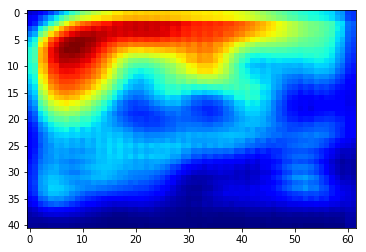

Original Count :  335


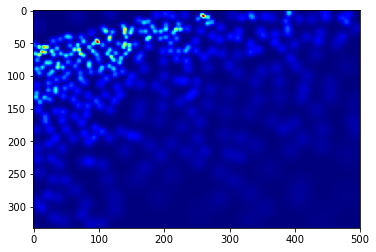

Original Image


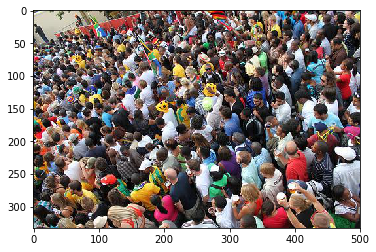

In [13]:
from matplotlib import cm as c
img = transform(Image.open('D:/datasets/ShanghaiTech/ShanghaiTech/part_A/test_data/images/IMG_15.jpg').convert('RGB')).cuda()

output = model(img.unsqueeze(0))
print("Predicted Count : ",int(output.detach().cpu().sum().numpy()))
temp = np.asarray(output.detach().cpu().reshape(output.detach().cpu().shape[2],output.detach().cpu().shape[3]))
plt.imshow(temp,cmap = c.jet)
plt.show()
temp = h5py.File('D:/datasets/ShanghaiTech/ShanghaiTech/part_A/test_data/ground_truth/IMG_15.h5', 'r')
temp_1 = np.asarray(temp['density'])
plt.imshow(temp_1,cmap = c.jet)
print("Original Count : ",int(np.sum(temp_1)) + 1)
plt.show()
print("Original Image")
plt.imshow(plt.imread('D:/datasets/ShanghaiTech/ShanghaiTech/part_A/test_data/images/IMG_15.jpg'))
plt.show()
